# Collision data vs compliant data

In [13]:
motor = pd.read_table('/Users/sunevan/Dropbox/Spring 2017/Big Data/ds1004project/part 2/NYPD_Motor_Vehicle_Collisions.out',header=-1)

motor.columns = ["year","month","weeknum",'weekday',"freq"]

crime = pd.read_table('/Users/sunevan/Dropbox/Spring 2017/Big Data/ds1004project/part 2/col5_summary_time.out',header=-1)

crime.columns = ["year","month","weeknum",'weekday',"freq"]

combined_df = pd.merge(crime, motor, on=["year","month","weeknum","weekday"], how='left')

In [14]:
combined_df.columns = ["year","month","weeknum",'weekday',"freq_complian","freq_motor"]
combined_df.to_csv("date collison and compliant.csv")

In [15]:
combine_df = combined_df[combined_df['freq_motor'].notnull()]

In [16]:
#combine_df['year'] = combine_df['year'].astype(str)
combine_df['month'] = combine_df['month'].astype(str)
#combine_df['weeknum'] = combine_df['weeknum'].astype(str)
combine_df['weekday'] = combine_df['weekday'].astype(str)

/Users/sunevan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sunevan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
import numpy
numpy.corrcoef(combine_df["freq_complian"], combine_df["freq_motor"])[0, 1]

0.40952282745252239

In [18]:
combine_df.head()

,year,month,weeknum,weekday,freq_complian,freq_motor
4,2012,10,42,4,1543,630.0
5,2013,6,26,5,1473,608.0
9,2012,11,45,4,1048,550.0
13,2013,12,50,3,1360,605.0
19,2014,11,48,5,1166,444.0


In [19]:
grouped = combine_df.groupby(["year","weeknum"],sort=True).sum()


In [20]:
numpy.corrcoef(grouped["freq_complian"], grouped["freq_motor"])[0, 1]

0.74382199865382681

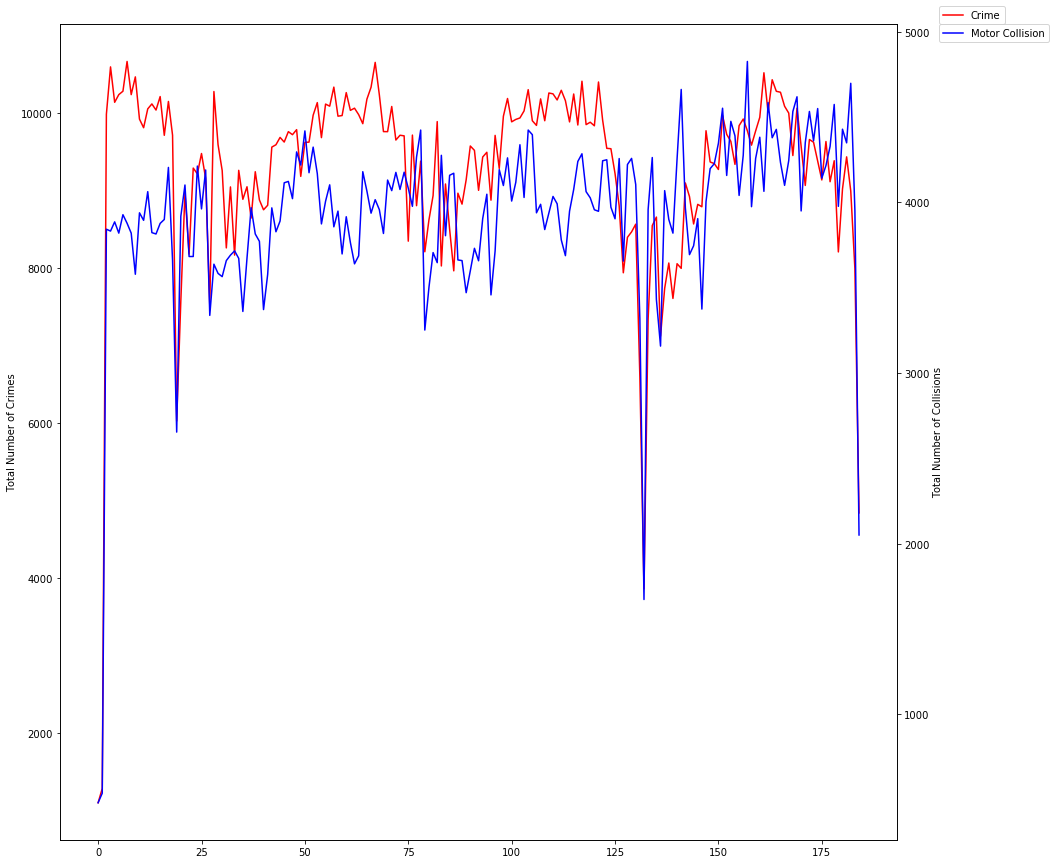

In [21]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
ax1.plot(list(grouped["freq_complian"]),color = "red",label = "Crime")

ax1.set_ylabel("Total Number of Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
ax2 = ax1.twinx()
ax2.plot(list(grouped["freq_motor"]),color = "blue", label = "Motor Collision")


ax2.set_ylabel("Total Number of Collisions")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()